# Appendix A: Python code

## import packages

In [1]:
import numpy as np
import pandas as pd
import sklearn
import math
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #OneHotEncoder for category variables
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Load dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

C:\Users\msm16\AppData\Local\Temp\ipykernel_19816\2817523562.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


## Train

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [5]:
train.duplicated().any()

False

In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/7/2015,5263,555,1,1,0,1
1,2,5,31/7/2015,6064,625,1,1,0,1
2,3,5,31/7/2015,8314,821,1,1,0,1
3,4,5,31/7/2015,13995,1498,1,1,0,1
4,5,5,31/7/2015,4822,559,1,1,0,1


In [7]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


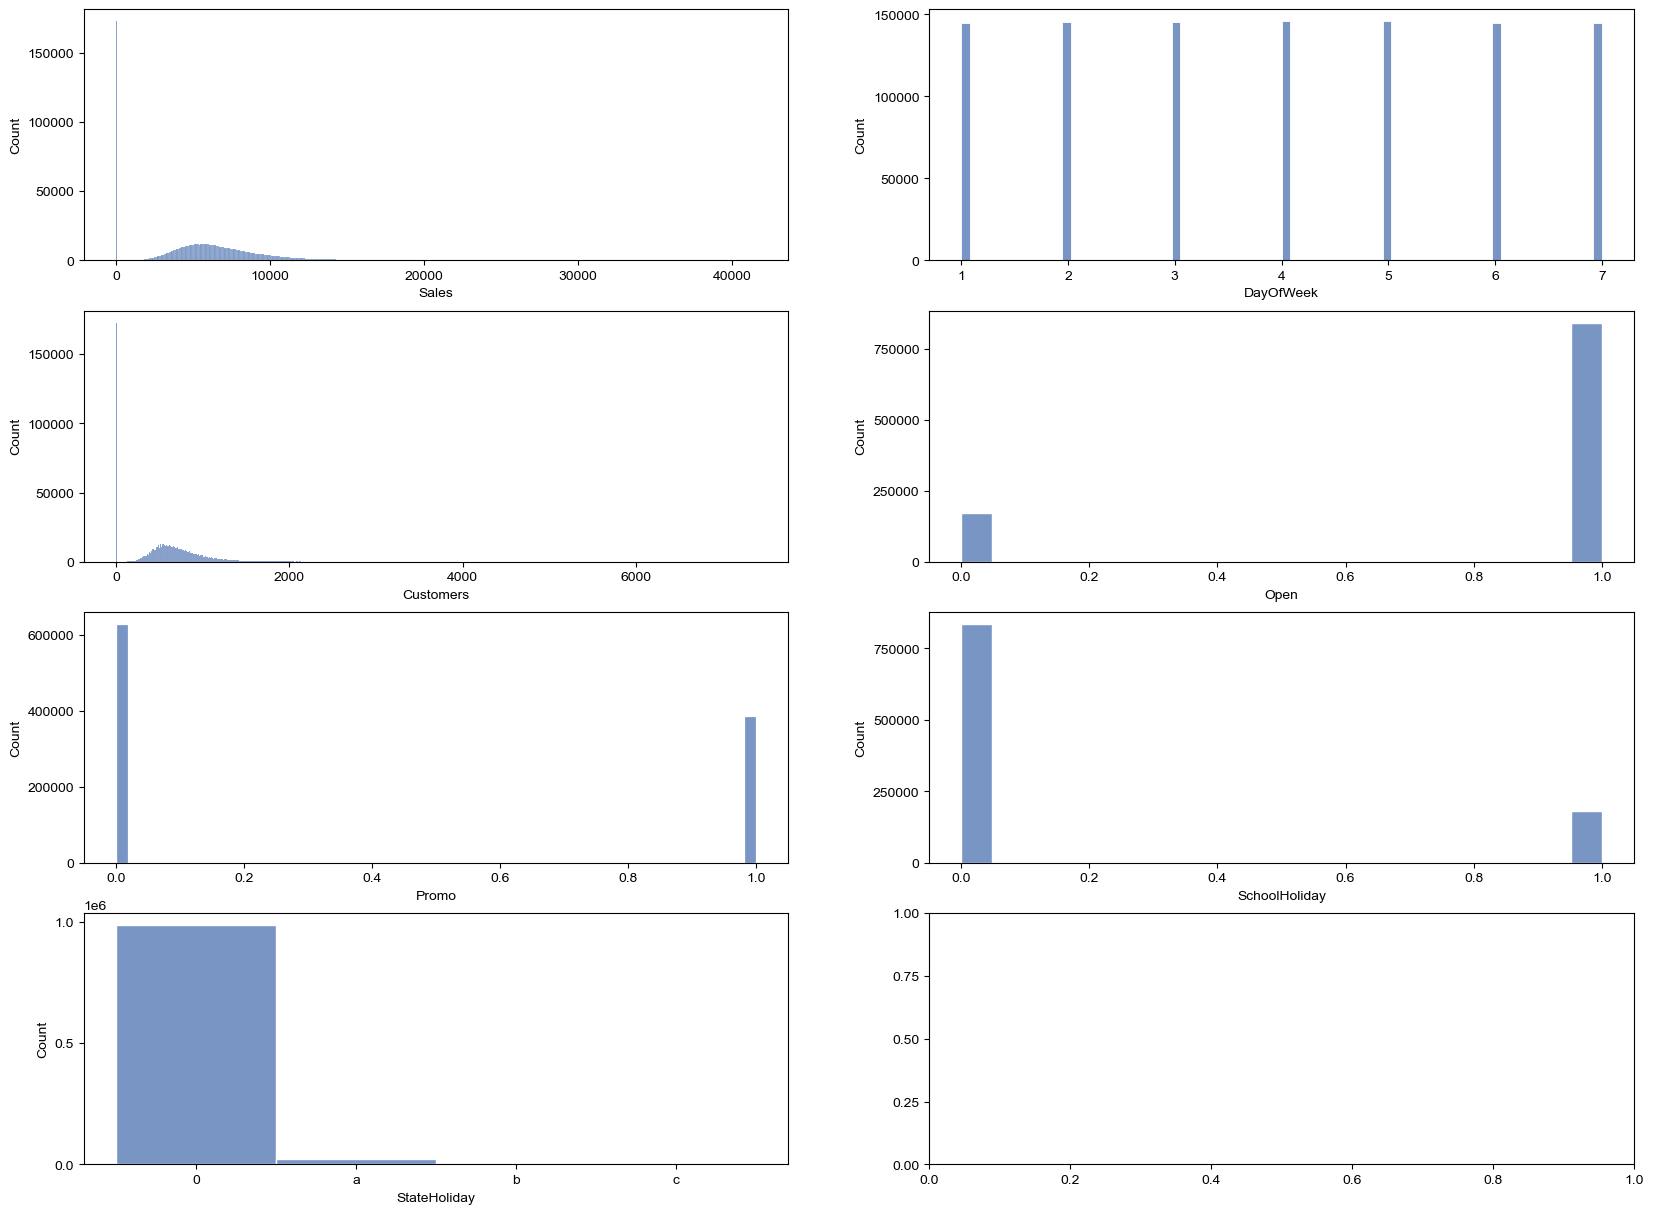

In [8]:
colNames = ['Sales', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'StateHoliday']
train['StateHoliday'] = train['StateHoliday'].astype(str)
fig, axs = plt.subplots(4,2, figsize=(20,15))
row = 0
col = 0
sns.set(font_scale = 2)
for i, x in enumerate(colNames):
    sns.histplot(data=train, x=colNames[i], kde=False, ax = axs[row, col])   
    col += 1
    if col > 1:
        row += 1
        col = 0

In [9]:
len(store.loc[(train['StateHoliday'] != 0) & (train['SchoolHoliday'] == 0)])

180

In [10]:
len(store.loc[(train['Open'] == 0) & (train['Customers'] != 0)])

0

In [11]:
len(store.loc[(train['Open'] == 0) & (train['Sales'] != 0)])

0

In [12]:
len(store.loc[(train['Sales'] == 0) & (train['Customers'] != 0)])

0

In [13]:
len(store.loc[(train['Sales'] != 0) & (train['Customers'] == 0)])

0

In [14]:
len(store.loc[(train['DayOfWeek'] > np.int64(5)) & (train['StateHoliday'] == 0)])

0

## Test

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [16]:
test.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,0.0,0.0,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,NaN,NaN,0.854322,0.395833,0.443487
std,320.274496,2.015481,NaN,NaN,0.352787,0.489035,0.496802
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,279.750000,2.000000,NaN,NaN,1.000000,0.000000,0.000000
50%,553.500000,4.000000,NaN,NaN,1.000000,0.000000,0.000000
75%,832.250000,6.000000,NaN,NaN,1.000000,1.000000,1.000000
max,1115.000000,7.000000,NaN,NaN,1.000000,1.000000,1.000000


In [17]:
test.isnull().sum()

Store                0
DayOfWeek            0
Date                 0
Sales            41088
Customers        41088
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
dtype: int64

In [18]:
test.duplicated().any()

False

## Store

In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [20]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [21]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
store.duplicated().any()

False

In [23]:
len(store.loc[(store['Promo2'] == 1) & (pd.isna(store['Promo2SinceWeek']) == True)])

0

In [24]:
len(store.loc[(store['Promo2'] == 1) & (pd.isna(store['Promo2SinceYear']) == True)])

0

In [25]:
len(store.loc[(pd.isna(store['Promo2SinceWeek']) == False) & (pd.isna(store['Promo2SinceYear']) == True)])

0

In [26]:
len(store.loc[(store['Promo2'] == 1) & (pd.isna(store['PromoInterval']) == True)])

0

In [27]:
print(store['PromoInterval'].unique())

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


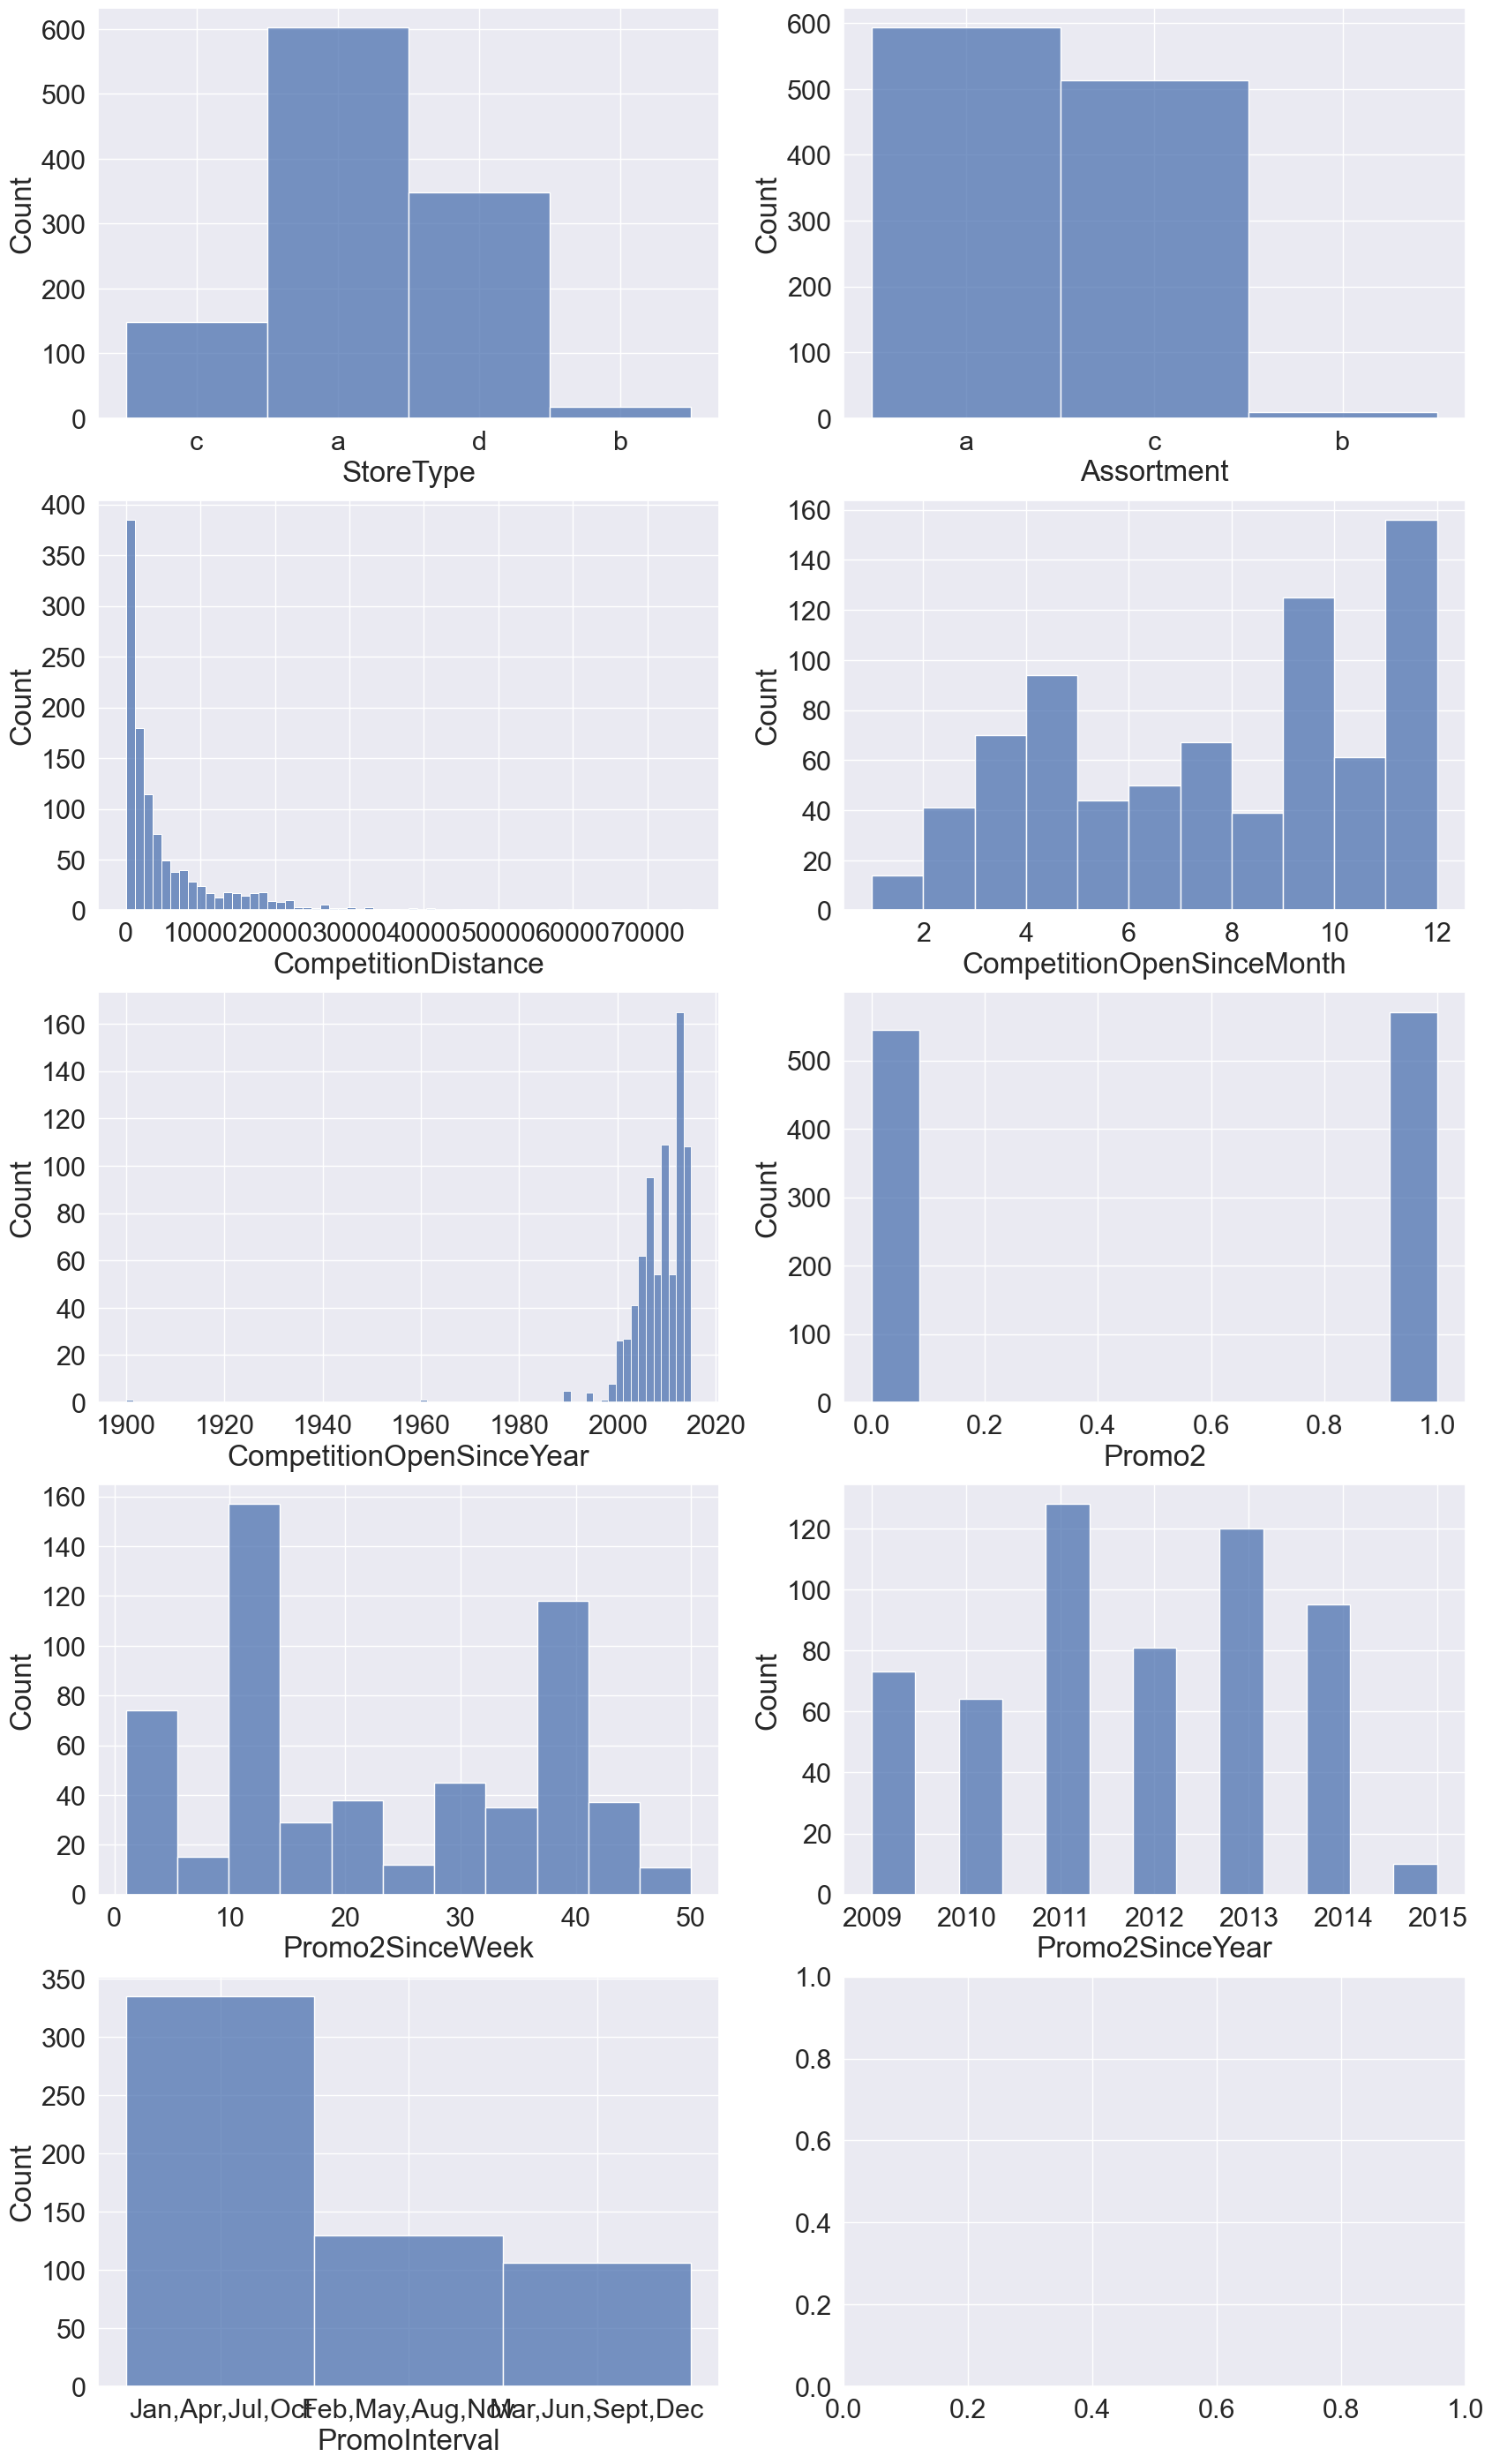

In [28]:
colNames = ['StoreType', 'Assortment', 'CompetitionDistance','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

fig, axs = plt.subplots(5,2, figsize=(20,35))
row = 0
col = 0
sns.set(font_scale = 1)
for i, x in enumerate(colNames):
    sns.histplot(data=store, x=colNames[i], kde=False, ax = axs[row, col])   
    col += 1
    if col > 1:
        row += 1
        col = 0

store['CompetitionOpenSinceYear'] is skewed

In [29]:
store['CompetitionDistance'].skew()

2.9292856455312055

In [30]:
store['CompetitionOpenSinceYear'].skew()

-8.013061944431684

store['CompetitionOpenSinceMonth'] is fairly symmetrical

In [31]:
store['CompetitionOpenSinceMonth'].skew()

-0.17075013215341991

In [32]:
store['CompetitionDistance'].fillna(store.groupby('StoreType')['CompetitionDistance'].transform('median'), inplace=True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean(), inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].median(), inplace = True)

In [33]:
store['CompetitionDistance'].isnull().any()

False

In [34]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [35]:
store.loc[store['Promo2SinceYear'].notnull(), 'Promo2SinceDate'] = (store['Promo2SinceYear']*1000 + store['Promo2SinceWeek'] * 10 + 0).astype('Int64')
store['Promo2SinceDate']
store['Promo2SinceDate'].notnull()

0       False
1        True
2        True
3       False
4       False
        ...  
1110     True
1111    False
1112    False
1113    False
1114     True
Name: Promo2SinceDate, Length: 1115, dtype: bool

In [36]:
store['Promo2SinceDate'] = pd.to_datetime(store['Promo2SinceDate'], format = '%Y%W%w')
store['Promo2SinceDate']

0             NaT
1      2010-04-04
2      2011-04-10
3             NaT
4             NaT
          ...    
1110   2013-08-11
1111          NaT
1112          NaT
1113          NaT
1114   2012-06-03
Name: Promo2SinceDate, Length: 1115, dtype: datetime64[ns]

In [37]:
store['CompetitionOpenSinceDate'] = store['CompetitionOpenSinceYear'].astype(int).astype(str) + '/' + store['CompetitionOpenSinceMonth'].astype(int).astype(str) + '/' + '1'
store['CompetitionOpenSinceDate']

0        2008/9/1
1       2007/11/1
2       2006/12/1
3        2009/9/1
4        2015/4/1
          ...    
1110     2014/6/1
1111     2006/4/1
1112     2010/7/1
1113     2010/7/1
1114     2010/7/1
Name: CompetitionOpenSinceDate, Length: 1115, dtype: object

In [38]:
store['CompetitionOpenSinceDate'] = pd.to_datetime(store['CompetitionOpenSinceDate'], format = "%Y/%m/%d")
store['CompetitionOpenSinceDate']

0      2008-09-01
1      2007-11-01
2      2006-12-01
3      2009-09-01
4      2015-04-01
          ...    
1110   2014-06-01
1111   2006-04-01
1112   2010-07-01
1113   2010-07-01
1114   2010-07-01
Name: CompetitionOpenSinceDate, Length: 1115, dtype: datetime64[ns]

In [39]:
categorical_cols = ['StoreType', 'Assortment', 'PromoInterval']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=int).fit(store[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
store[encoded_cols] = encoder.transform(store[categorical_cols])
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Store                           1115 non-null   int64         
 1   StoreType                       1115 non-null   object        
 2   Assortment                      1115 non-null   object        
 3   CompetitionDistance             1115 non-null   float64       
 4   CompetitionOpenSinceMonth       1115 non-null   float64       
 5   CompetitionOpenSinceYear        1115 non-null   float64       
 6   Promo2                          1115 non-null   int64         
 7   Promo2SinceWeek                 571 non-null    float64       
 8   Promo2SinceYear                 571 non-null    float64       
 9   PromoInterval                   571 non-null    object        
 10  Promo2SinceDate                 571 non-null    datetime64[ns]
 11  Comp

In [40]:
store = store.drop(['StoreType_a', 'Assortment_a', 'PromoInterval_nan'], axis = 1)
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Store                           1115 non-null   int64         
 1   StoreType                       1115 non-null   object        
 2   Assortment                      1115 non-null   object        
 3   CompetitionDistance             1115 non-null   float64       
 4   CompetitionOpenSinceMonth       1115 non-null   float64       
 5   CompetitionOpenSinceYear        1115 non-null   float64       
 6   Promo2                          1115 non-null   int64         
 7   Promo2SinceWeek                 571 non-null    float64       
 8   Promo2SinceYear                 571 non-null    float64       
 9   PromoInterval                   571 non-null    object        
 10  Promo2SinceDate                 571 non-null    datetime64[ns]
 11  Comp

## Join train and store by store

In [41]:
train['Date'] = pd.to_datetime(train['Date'], format="%d/%m/%Y")
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


## Drop rows with Open=0 from Train

In [42]:
train[train['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [43]:
train = train.drop(train[train.Open == 0].index)

In [44]:
train[train['Open'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


## Drop 'Customers', 'Open' from train

In [45]:
#train = train.drop(train[(train['Open'] == 0)].index)
train = train.drop(['Customers', 'Open'], axis = 1)
train

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,1,0,1
1,2,5,2015-07-31,6064,1,0,1
2,3,5,2015-07-31,8314,1,0,1
3,4,5,2015-07-31,13995,1,0,1
4,5,5,2015-07-31,4822,1,0,1
...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,a,1
1016827,733,2,2013-01-01,10765,0,a,1
1016863,769,2,2013-01-01,5035,0,a,1
1017042,948,2,2013-01-01,4491,0,a,1


In [46]:
train['DayOfWeek'] = train['DayOfWeek'].astype(str)
train['StateHoliday'] = train['StateHoliday'].astype(str) #typecasting to avoid encoder error
categorical_cols = ['DayOfWeek', 'StateHoliday']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop = 'first', dtype=int).fit(train[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train[encoded_cols] = encoder.transform(train[categorical_cols])

train

,Store,DayOfWeek,Date,Sales,Promo,StateHoliday,SchoolHoliday,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,1,0,1,0,0,0,1,0,0,0,0,0
1,2,5,2015-07-31,6064,1,0,1,0,0,0,1,0,0,0,0,0
2,3,5,2015-07-31,8314,1,0,1,0,0,0,1,0,0,0,0,0
3,4,5,2015-07-31,13995,1,0,1,0,0,0,1,0,0,0,0,0
4,5,5,2015-07-31,4822,1,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,a,1,1,0,0,0,0,0,1,0,0
1016827,733,2,2013-01-01,10765,0,a,1,1,0,0,0,0,0,1,0,0
1016863,769,2,2013-01-01,5035,0,a,1,1,0,0,0,0,0,1,0,0
1017042,948,2,2013-01-01,4491,0,a,1,1,0,0,0,0,0,1,0,0


In [47]:
merged1 = pd.merge(store, train)
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   StoreType                       844392 non-null  object        
 2   Assortment                      844392 non-null  object        
 3   CompetitionDistance             844392 non-null  float64       
 4   CompetitionOpenSinceMonth       844392 non-null  float64       
 5   CompetitionOpenSinceYear        844392 non-null  float64       
 6   Promo2                          844392 non-null  int64         
 7   Promo2SinceWeek                 421085 non-null  float64       
 8   Promo2SinceYear                 421085 non-null  float64       
 9   PromoInterval                   421085 non-null  object        
 10  Promo2SinceDate                 421085 non-null  datetim

In [48]:
merged1['CompetitionDays'] = np.where(merged1['Date'] > merged1['CompetitionOpenSinceDate'], (merged1['Date'] - merged1['CompetitionOpenSinceDate']).astype('timedelta64[D]'), 0)
merged1['CompetitionDays']

0         2524.0
1         2523.0
2         2522.0
3         2521.0
4         2520.0
           ...  
844387     921.0
844388     919.0
844389     918.0
844390     917.0
844391     916.0
Name: CompetitionDays, Length: 844392, dtype: float64

In [49]:
merged1['Promo2Days'] = np.where(merged1['Date'] > merged1['Promo2SinceDate'], (merged1['Date'] - merged1['Promo2SinceDate']).astype('timedelta64[D]'), 0)
merged1['Promo2Days']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
844387    218.0
844388    216.0
844389    215.0
844390    214.0
844391    213.0
Name: Promo2Days, Length: 844392, dtype: float64

In [50]:
merged1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDays,Promo2Days
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,421085.000000,421085.000000,844392.000000,844392.000000,844392.000000,...,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,5453.879987,7.224823,2009.112021,0.498684,23.253426,2011.754019,0.018431,0.133798,0.306462,...,0.168093,0.159457,0.164189,0.170606,0.004255,0.000822,0.000172,0.000084,1724.846744,394.177489
std,321.731914,7800.140341,2.650806,4.973550,0.499999,14.100569,1.660962,0.134504,0.340435,0.461024,...,0.373949,0.366102,0.370447,0.376164,0.065092,0.028657,0.013103,0.009169,1805.636949,575.292241
min,1.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,710.000000,6.000000,2008.000000,0.000000,13.000000,2011.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,900.000000,0.000000
50%,558.000000,2330.000000,7.224704,2010.000000,0.000000,22.000000,2012.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1421.000000,0.000000
75%,837.000000,6880.000000,9.000000,2011.000000,1.000000,37.000000,2013.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2229.000000,751.000000
max,1115.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42214.000000,2182.000000


In [51]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   StoreType                       844392 non-null  object        
 2   Assortment                      844392 non-null  object        
 3   CompetitionDistance             844392 non-null  float64       
 4   CompetitionOpenSinceMonth       844392 non-null  float64       
 5   CompetitionOpenSinceYear        844392 non-null  float64       
 6   Promo2                          844392 non-null  int64         
 7   Promo2SinceWeek                 421085 non-null  float64       
 8   Promo2SinceYear                 421085 non-null  float64       
 9   PromoInterval                   421085 non-null  object        
 10  Promo2SinceDate                 421085 non-null  datetim

## Generate 'Promo2Month' Categorical variable

In [52]:
tempList1 = ["Third", "First", "Second"] * 4
tempList2 = ["First", "Second", "Third"] * 4
tempList3 = ["Second", "Third", "First"] * 4
tempList1[1]

'First'

Take month out from train['Date']

In [53]:
merged1['Month'] = pd.DatetimeIndex(merged1['Date']).month
merged1['Month'] = merged1['Month'].astype(int)
merged1['Month']

0         7
1         7
2         7
3         7
4         7
         ..
844387    1
844388    1
844389    1
844390    1
844391    1
Name: Month, Length: 844392, dtype: int32

In [54]:
def return_month(x): return tempList1[x- 1]
merged1['Promo2Month'] = merged1.loc[merged1['PromoInterval_Feb,May,Aug,Nov'] == 1, 'Month'].apply(return_month)

In [55]:
merged1.loc[merged1['Promo2Month'] == 'First', 'Promo2Month']

9440      First
9441      First
9442      First
9443      First
9444      First
          ...  
836862    First
836863    First
836864    First
836865    First
836866    First
Name: Promo2Month, Length: 30860, dtype: object

In [56]:
#merged1.to_excel(r'C:\Users\msm16\Desktop\Gdrive\Manchester\UdatE\groupwork2\data.xlsx')

In [57]:
def return_month2(x): return tempList2[x - 1]
merged1.loc[merged1['PromoInterval_Jan,Apr,Jul,Oct'] == 1, 'Promo2Month'] = merged1.loc[merged1['PromoInterval_Jan,Apr,Jul,Oct'] == 1, 'Month'].apply(return_month2)

In [58]:
def return_month3(x): return tempList3[x - 1]
merged1.loc[merged1['PromoInterval_Mar,Jun,Sept,Dec'] == 1, 'Promo2Month'] = merged1.loc[merged1['PromoInterval_Mar,Jun,Sept,Dec'] == 1, 'Month'].apply(return_month3)

In [59]:
merged1['Promo2Month'].isnull().sum()

423307

In [60]:
categorical_cols = ['Promo2Month']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=int).fit(merged1[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
merged1[encoded_cols] = encoder.transform(merged1[categorical_cols])


In [61]:
merged1 = merged1.drop('Promo2Month_nan', axis = 1)

In [62]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   StoreType                       844392 non-null  object        
 2   Assortment                      844392 non-null  object        
 3   CompetitionDistance             844392 non-null  float64       
 4   CompetitionOpenSinceMonth       844392 non-null  float64       
 5   CompetitionOpenSinceYear        844392 non-null  float64       
 6   Promo2                          844392 non-null  int64         
 7   Promo2SinceWeek                 421085 non-null  float64       
 8   Promo2SinceYear                 421085 non-null  float64       
 9   PromoInterval                   421085 non-null  object        
 10  Promo2SinceDate                 421085 non-null  datetim

In [63]:
len(merged1.loc[(merged1['PromoInterval_Feb,May,Aug,Nov'] == 0) & (merged1['PromoInterval_Jan,Apr,Jul,Oct'] == 0) & (merged1['PromoInterval_Mar,Jun,Sept,Dec'] == 0)])

423307

In [64]:
len(merged1.loc[(merged1['Promo2Month_First'] == 0) & (merged1['Promo2Month_Second'] == 0) & (merged1['Promo2Month_Third'] == 0)])

423307

In [65]:
len(merged1.loc[(merged1['StoreType_b'] == 0) & (merged1['StoreType_c'] == 0) & (merged1['StoreType_d'] == 0)])

457077

## Standardisation

In [66]:
scaler = StandardScaler()
merged1_sc = merged1.copy(deep=True)

merged1_sc[['CompetitionDistance', 'CompetitionDays', 'Promo2Days', 'Sales']] = StandardScaler().fit_transform(merged1_sc[['CompetitionDistance', 'CompetitionDays', 'Promo2Days', 'Sales']])
merged1_sc

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDays,Promo2Days,Month,Promo2Month,Promo2Month_First,Promo2Month_Second,Promo2Month_Third
0,1,c,a,-0.536386,9.000000,2008.0,0,NaN,NaN,NaN,...,0,0,0,0.442588,-0.685178,7,NaN,0,0,0
1,1,c,a,-0.536386,9.000000,2008.0,0,NaN,NaN,NaN,...,0,0,0,0.442034,-0.685178,7,NaN,0,0,0
2,1,c,a,-0.536386,9.000000,2008.0,0,NaN,NaN,NaN,...,0,0,0,0.441481,-0.685178,7,NaN,0,0,0
3,1,c,a,-0.536386,9.000000,2008.0,0,NaN,NaN,NaN,...,0,0,0,0.440927,-0.685178,7,NaN,0,0,0
4,1,c,a,-0.536386,9.000000,2008.0,0,NaN,NaN,NaN,...,0,0,0,0.440373,-0.685178,7,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,-0.013318,7.224704,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,0,-0.445188,-0.306240,1,Second,0,1,0
844388,1115,d,c,-0.013318,7.224704,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,0,-0.446295,-0.309717,1,Second,0,1,0
844389,1115,d,c,-0.013318,7.224704,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,0,-0.446849,-0.311455,1,Second,0,1,0
844390,1115,d,c,-0.013318,7.224704,2010.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",...,0,0,0,-0.447403,-0.313193,1,Second,0,1,0


## Drop temporal variables

In [67]:
dropCols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2SinceDate', 'CompetitionOpenSinceDate',
           'Month']

merged2 = merged1_sc.drop(dropCols, axis = 1)

merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   StoreType                       844392 non-null  object        
 2   Assortment                      844392 non-null  object        
 3   CompetitionDistance             844392 non-null  float64       
 4   Promo2                          844392 non-null  int64         
 5   PromoInterval                   421085 non-null  object        
 6   StoreType_b                     844392 non-null  int32         
 7   StoreType_c                     844392 non-null  int32         
 8   StoreType_d                     844392 non-null  int32         
 9   Assortment_b                    844392 non-null  int32         
 10  Assortment_c                    844392 non-null  int32  

## Univariate analysis

<AxesSubplot:xlabel='StoreType', ylabel='Sales'>

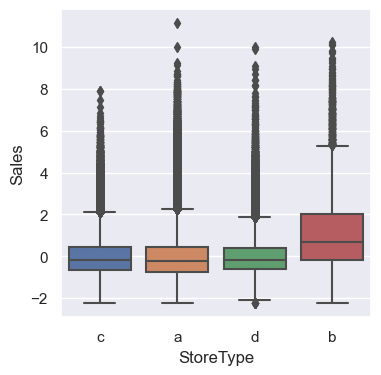

In [68]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1)
sns.boxplot(y='Sales', x='StoreType', data=merged2)

<AxesSubplot:xlabel='Assortment', ylabel='Sales'>

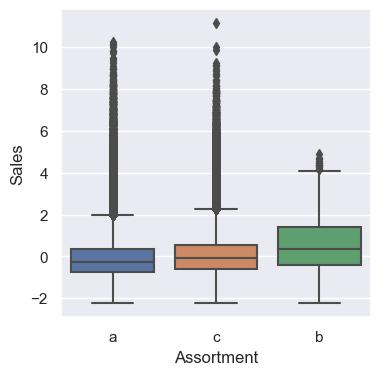

In [69]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1)
sns.boxplot(y='Sales', x='Assortment', data=merged2)

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

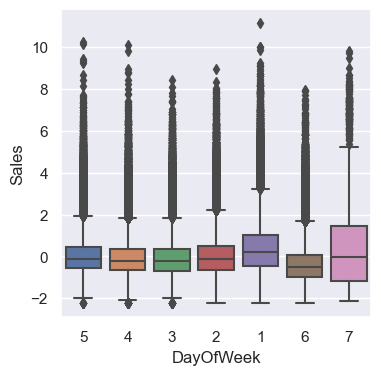

In [70]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1)
sns.boxplot(y='Sales', x='DayOfWeek', data=merged2)

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

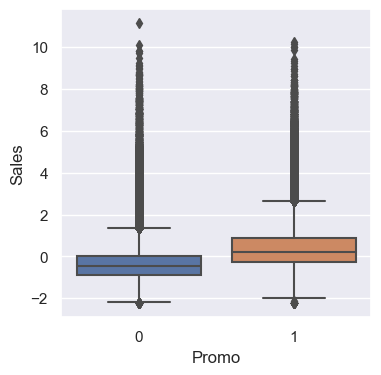

In [71]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Sales', x='Promo', data=merged2)

<AxesSubplot:xlabel='Promo2', ylabel='Sales'>

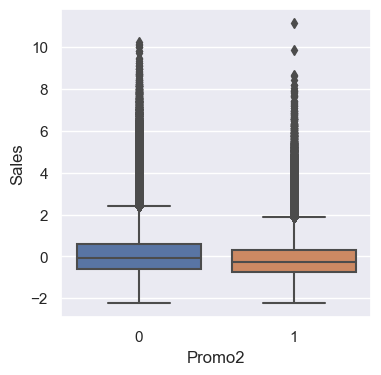

In [72]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1)
sns.boxplot(y='Sales', x='Promo2', data=merged2)

<AxesSubplot:xlabel='PromoInterval', ylabel='Sales'>

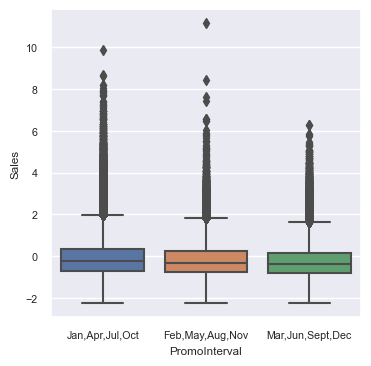

In [73]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 0.7)
sns.boxplot(y='Sales', x='PromoInterval', data=merged2)

<AxesSubplot:xlabel='Promo2Month', ylabel='Sales'>

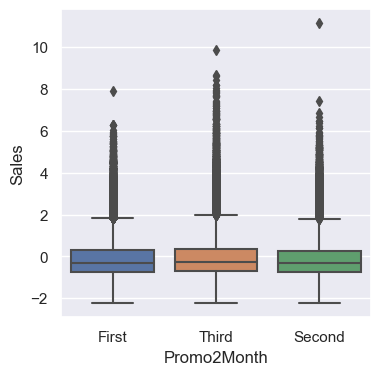

In [74]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1)
sns.boxplot(y='Sales', x='Promo2Month', data=merged2)

<AxesSubplot:xlabel='StateHoliday', ylabel='Sales'>

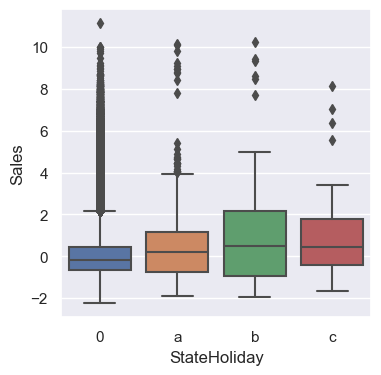

In [75]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Sales', x='StateHoliday', data=merged2)

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

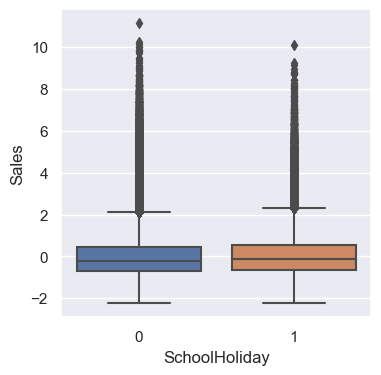

In [76]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Sales', x='SchoolHoliday', data=merged2)

In [77]:
corr = merged2.corr()
corr

,Store,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct",...,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDays,Promo2Days,Promo2Month_First,Promo2Month_Second,Promo2Month_Third
Store,1.000000,-0.027111,0.007736,-0.001065,0.060829,-0.050689,0.021366,0.003600,0.007781,0.011702,...,-0.000116,0.003141,0.002692,0.000315,0.000428,0.005067,-0.014662,0.003853,0.002995,0.003533
CompetitionDistance,-0.027111,1.000000,-0.141331,-0.076970,-0.097739,0.129568,-0.054181,0.154227,-0.051199,-0.083819,...,-0.001354,0.043321,0.010287,0.005833,-0.003989,-0.021608,-0.055730,-0.064618,-0.062447,-0.062743
Promo2,0.007736,-0.141331,1.000000,-0.057567,-0.000872,0.094088,-0.013159,0.009725,0.363316,0.636250,...,0.001653,-0.028629,-0.008025,-0.005479,-0.003980,0.046820,0.686984,0.456960,0.441146,0.444895
StoreType_b,-0.001065,-0.076970,-0.057567,1.000000,-0.053855,-0.091089,0.723203,-0.110701,-0.024062,-0.032150,...,-0.010302,0.290793,0.083636,0.065401,0.062120,0.007666,-0.067050,-0.026125,-0.025800,-0.025392
StoreType_c,0.060829,-0.097739,-0.000872,-0.053855,1.000000,-0.261257,-0.038948,0.014411,-0.010512,-0.034942,...,0.000863,-0.025692,-0.003381,-0.005151,-0.003604,0.016770,0.025307,-0.002233,0.002256,-0.001147
StoreType_d,-0.050689,0.129568,0.094088,-0.091089,-0.261257,1.000000,-0.065876,0.231704,0.041521,0.054858,...,0.001453,-0.032523,-0.009384,-0.006947,-0.005816,-0.037852,0.082898,0.042573,0.041780,0.042017
Assortment_b,0.021366,-0.054181,-0.013159,0.723203,-0.038948,-0.065876,1.000000,-0.092089,-0.000834,-0.012898,...,-0.007443,0.210432,0.069589,0.048434,0.043838,0.029375,-0.036545,-0.006184,-0.006119,-0.005368
Assortment_c,0.003600,0.154227,0.009725,-0.110701,0.014411,0.231704,-0.092089,1.000000,-0.031743,-0.020119,...,0.000120,-0.009483,-0.007258,-0.003478,-0.006190,-0.069586,-0.022641,0.003139,0.007150,0.002811
"PromoInterval_Feb,May,Aug,Nov",0.007781,-0.051199,0.363316,-0.024062,-0.010512,0.041521,-0.000834,-0.031743,1.000000,-0.229947,...,0.000548,-0.016133,-0.006135,-0.003056,-0.001710,-0.017492,0.281637,0.137207,0.156125,0.195095
"PromoInterval_Jan,Apr,Jul,Oct",0.011702,-0.083819,0.636250,-0.032150,-0.034942,0.054858,-0.012898,-0.020119,-0.229947,1.000000,...,0.001331,-0.014779,-0.002671,-0.002922,-0.001822,0.065451,0.475075,0.324155,0.262004,0.267621


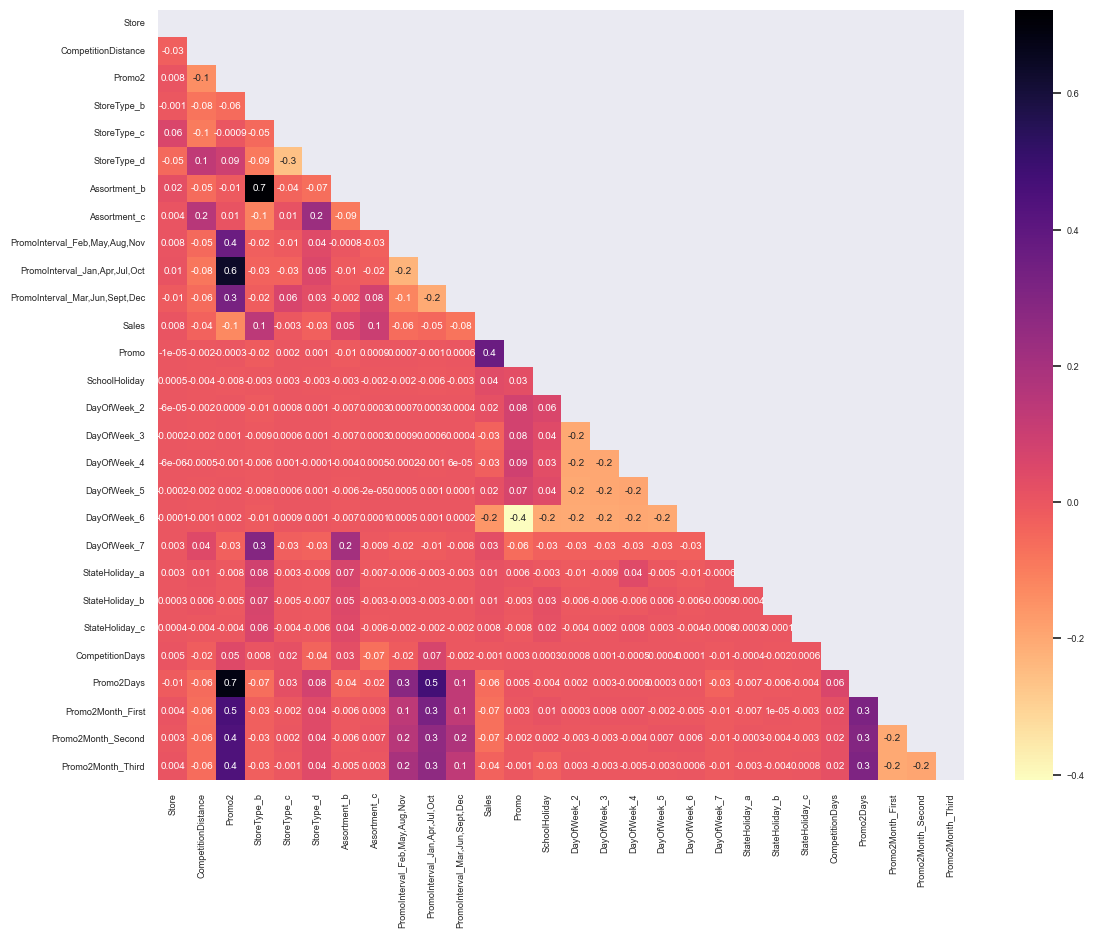

In [78]:
mask = np.zeros_like(corr, dtype = bool)
sns.set(font_scale = 0.6, rc={'figure.figsize':(13,10)})

mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = 'magma_r', mask = mask, annot = True, fmt='.1g');

## Drop categorical variables and Feature Selection

In [79]:
dropCols = ['StoreType', 'Assortment', 'PromoInterval', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 
            'PromoInterval_Mar,Jun,Sept,Dec',  'StateHoliday', 'DayOfWeek', 'Promo2Month']

merged3_backup = merged2.drop(dropCols, axis = 1)

dropCols2 = ['Promo2Days', 'Promo2Month_First', 'Promo2Month_Second', 'Promo2Month_Third', 'SchoolHoliday']
merged3 = merged3_backup.drop(dropCols2, axis = 1)
merged3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                844392 non-null  int64         
 1   CompetitionDistance  844392 non-null  float64       
 2   Promo2               844392 non-null  int64         
 3   StoreType_b          844392 non-null  int32         
 4   StoreType_c          844392 non-null  int32         
 5   StoreType_d          844392 non-null  int32         
 6   Assortment_b         844392 non-null  int32         
 7   Assortment_c         844392 non-null  int32         
 8   Date                 844392 non-null  datetime64[ns]
 9   Sales                844392 non-null  float64       
 10  Promo                844392 non-null  int64         
 11  DayOfWeek_2          844392 non-null  int32         
 12  DayOfWeek_3          844392 non-null  int32         
 13  DayOfWeek_4   

In [80]:
merged3.head()

,Store,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Date,Sales,...,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDays
0,1,-0.536386,0,0,1,0,0,0,2015-07-31,-0.545231,...,0,0,0,1,0,0,0,0,0,0.442588
1,1,-0.536386,0,0,1,0,0,0,2015-07-30,-0.623512,...,0,0,1,0,0,0,0,0,0,0.442034
2,1,-0.536386,0,0,1,0,0,0,2015-07-29,-0.700182,...,0,1,0,0,0,0,0,0,0,0.441481
3,1,-0.536386,0,0,1,0,0,0,2015-07-28,-0.626411,...,1,0,0,0,0,0,0,0,0,0.440927
4,1,-0.536386,0,0,1,0,0,0,2015-07-27,-0.274954,...,0,0,0,0,0,0,0,0,0,0.440373


In [81]:
merged3.describe()

,Store,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales,Promo,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDays
count,844392.000000,8.443920e+05,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,8.443920e+05,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,8.443920e+05
mean,558.422920,-8.933975e-15,0.498684,0.018431,0.133798,0.306462,0.009725,0.463376,1.131728e-16,0.446352,0.170491,0.168093,0.159457,0.164189,0.170606,0.004255,0.000822,0.000172,0.000084,1.490859e-14
std,321.731914,1.000001e+00,0.499999,0.134504,0.340435,0.461024,0.098136,0.498657,1.000001e+00,0.497114,0.376064,0.373949,0.366102,0.370447,0.376164,0.065092,0.028657,0.013103,0.009169,1.000001e+00
min,1.000000,-6.966392e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.240669e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.552572e-01
25%,280.000000,-6.081792e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.753771e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.568179e-01
50%,558.000000,-4.004905e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.889414e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.682769e-01
75%,837.000000,1.828327e-01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.524450e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.792109e-01
max,1115.000000,9.026269e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.114469e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.242376e+01


In [82]:
X_train = merged3.drop(['Store', 'Sales', 'Date'], axis = 1)

In [83]:
X_train.head()

,CompetitionDistance,Promo2,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Promo,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_a,StateHoliday_b,StateHoliday_c,CompetitionDays
0,-0.536386,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.442588
1,-0.536386,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0.442034
2,-0.536386,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0.441481
3,-0.536386,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0.440927
4,-0.536386,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.440373


In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CompetitionDistance  844392 non-null  float64
 1   Promo2               844392 non-null  int64  
 2   StoreType_b          844392 non-null  int32  
 3   StoreType_c          844392 non-null  int32  
 4   StoreType_d          844392 non-null  int32  
 5   Assortment_b         844392 non-null  int32  
 6   Assortment_c         844392 non-null  int32  
 7   Promo                844392 non-null  int64  
 8   DayOfWeek_2          844392 non-null  int32  
 9   DayOfWeek_3          844392 non-null  int32  
 10  DayOfWeek_4          844392 non-null  int32  
 11  DayOfWeek_5          844392 non-null  int32  
 12  DayOfWeek_6          844392 non-null  int32  
 13  DayOfWeek_7          844392 non-null  int32  
 14  StateHoliday_a       844392 non-null  int32  
 15  StateHoliday_b   

In [85]:
y_train = merged3['Sales']

In [86]:
y_train.head()

0   -0.545231
1   -0.623512
2   -0.700182
3   -0.626411
4   -0.274954
Name: Sales, dtype: float64

## LinearRegression

In [87]:
lm = LinearRegression()
folds = KFold(n_splits = 10, shuffle = True, random_state = 18)

In [88]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_train) #change it to X_test
print(r2(y_train, y_pred))
print(np.sqrt(mse(y_train, y_pred)))

0.2193616952705173
0.8835373816254083


In [89]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CompetitionDistance  844392 non-null  float64
 1   Promo2               844392 non-null  int64  
 2   StoreType_b          844392 non-null  int32  
 3   StoreType_c          844392 non-null  int32  
 4   StoreType_d          844392 non-null  int32  
 5   Assortment_b         844392 non-null  int32  
 6   Assortment_c         844392 non-null  int32  
 7   Promo                844392 non-null  int64  
 8   DayOfWeek_2          844392 non-null  int32  
 9   DayOfWeek_3          844392 non-null  int32  
 10  DayOfWeek_4          844392 non-null  int32  
 11  DayOfWeek_5          844392 non-null  int32  
 12  DayOfWeek_6          844392 non-null  int32  
 13  DayOfWeek_7          844392 non-null  int32  
 14  StateHoliday_a       844392 non-null  int32  
 15  StateHoliday_b   

In [90]:
print(lm.intercept_, lm.coef_)

-0.004584488962869075 [-0.05913253 -0.24684785  1.62954814 -0.03348544 -0.06526007 -0.9800906
  0.27409446  0.73584807 -0.3435198  -0.46083176 -0.4597837  -0.33775529
 -0.33972954 -0.26463862  0.06769569  0.06568785  0.29398759  0.01185127]


In [91]:
pd.DataFrame(zip(X_train.columns, lm.coef_))

,0,1
0,CompetitionDistance,-0.059133
1,Promo2,-0.246848
2,StoreType_b,1.629548
3,StoreType_c,-0.033485
4,StoreType_d,-0.065260
5,Assortment_b,-0.980091
6,Assortment_c,0.274094
7,Promo,0.735848
8,DayOfWeek_2,-0.343520
9,DayOfWeek_3,-0.460832


In [92]:
lm.score(X_train, y_train)

0.2193616952705173

In [93]:
mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
rmse = math.sqrt(mse)
rmse

0.8835373816254083

## DecisionTreeRegression

In [94]:
regressor = DecisionTreeRegressor(max_depth = 25, random_state = 18)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

In [95]:
print(r2(y_train, y_pred))
mse = sklearn.metrics.mean_squared_error(y_train, y_pred)
rmse = math.sqrt(mse)
rmse

0.9056418667090984


0.3071776900930494

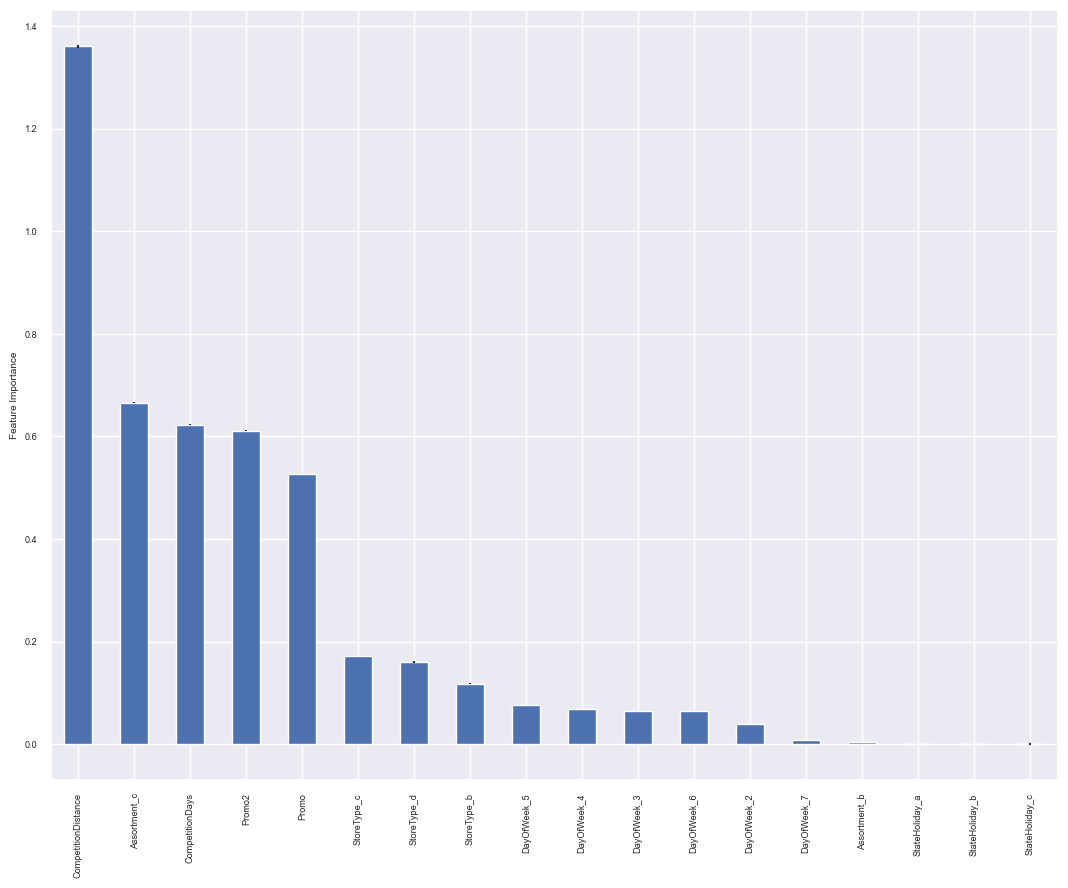

In [96]:
result = permutation_importance(regressor, X_train, y_train, n_repeats = 10, random_state = 18)
feature_importances = pd.Series(result.importances_mean, index=list(X_train.columns))
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances
font = {'size': 20}
plt.rc('font', **font)
feature_importances.plot.bar(yerr=result.importances_std)
plt.ylabel("Feature Importance")
plt.show()

In [97]:
regressor.predict

<bound method BaseDecisionTree.predict of DecisionTreeRegressor(max_depth=25, random_state=18)>

In [98]:
import shap
explainer = shap.TreeExplainer(regressor)
explainer

In [99]:
shap_values2 = explainer(X_train.iloc[0:2000])

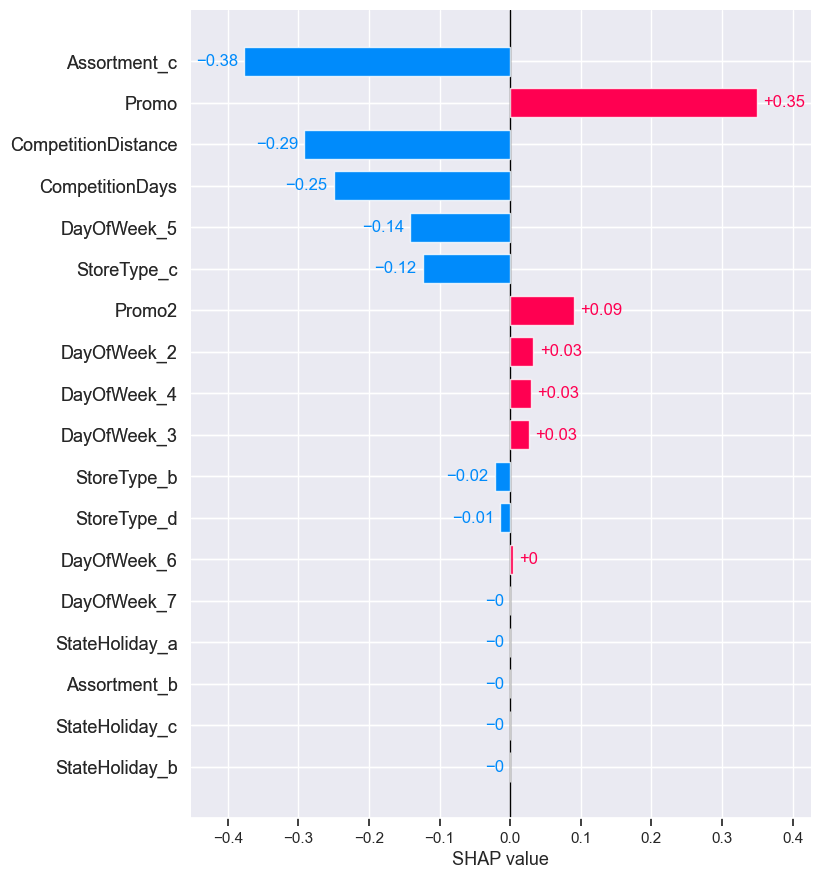

In [100]:
shap.plots.bar(shap_values2[0], max_display=30)

## Predict Sales for Test dataset

In [101]:
test['Date'] = pd.to_datetime(test['Date'], format="%d/%m/%Y")

In [ ]:
test = test.drop(test[test.Open == 0].index)
test = test.drop(['Customers', 'Open'], axis = 1)
test['DayOfWeek'] = test['DayOfWeek'].astype(str)
test['StateHoliday'] = test['StateHoliday'].astype(str)
categorical_cols = ['DayOfWeek', 'StateHoliday']

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', drop = 'first', dtype=int).fit(test[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
test[encoded_cols] = encoder.transform(test[categorical_cols])

merged1t = pd.merge(store, test)
merged1t['CompetitionDays'] = np.where(merged1t['Date'] > merged1t['CompetitionOpenSinceDate'], (merged1t['Date'] - merged1t['CompetitionOpenSinceDate']).astype('timedelta64[D]'), 0)

In [106]:
merged1t_sc = merged1t.copy(deep=True)
merged1t_sc[['CompetitionDistance', 'CompetitionDays']] = StandardScaler().fit_transform(merged1t_sc[['CompetitionDistance', 'CompetitionDays']])

In [107]:
dropCols = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'Promo2SinceDate', 'CompetitionOpenSinceDate',
           'StoreType', 'Assortment', 'PromoInterval', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 
            'PromoInterval_Mar,Jun,Sept,Dec',  'StateHoliday', 'DayOfWeek', 'SchoolHoliday']

merged3t = merged1t_sc.drop(dropCols, axis = 1)
merged3t['StateHoliday_b'] = 0
merged3t['StateHoliday_c'] = 0


In [108]:
X_test = merged3t.drop(['Store', 'Sales', 'Date'], axis = 1)
y_test = merged3t['Sales']

y_predt = regressor.predict(X_test)

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.



In [109]:
test['Sales'] = y_predt

In [110]:
test['Sales']

0        0.229174
1        0.340874
2        0.465193
3        0.981129
4        0.284931
           ...   
41083   -0.241451
41084    0.259579
41085   -0.123022
41086    0.630289
41087   -0.194427
Name: Sales, Length: 35104, dtype: float64

In [111]:
test.to_excel('test_prediction.xlsx')